In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\pawan\\Downloads\\Python\\Decision Tree\\Decision Tree Assesment'

In [281]:
data = pd.read_csv('admission.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Q.1	Perform Exploratory Data Analysis (EDA) tasks 

#### a) Visualize the 10 random rows of the data set
#### b) Generate the description for numeric variables
#### c) Check the shape of the data set
#### d) Generate the correlation matrix
#### e) Generate a correlogram	[40]


In [282]:
data.shape

(500, 9)

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [284]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


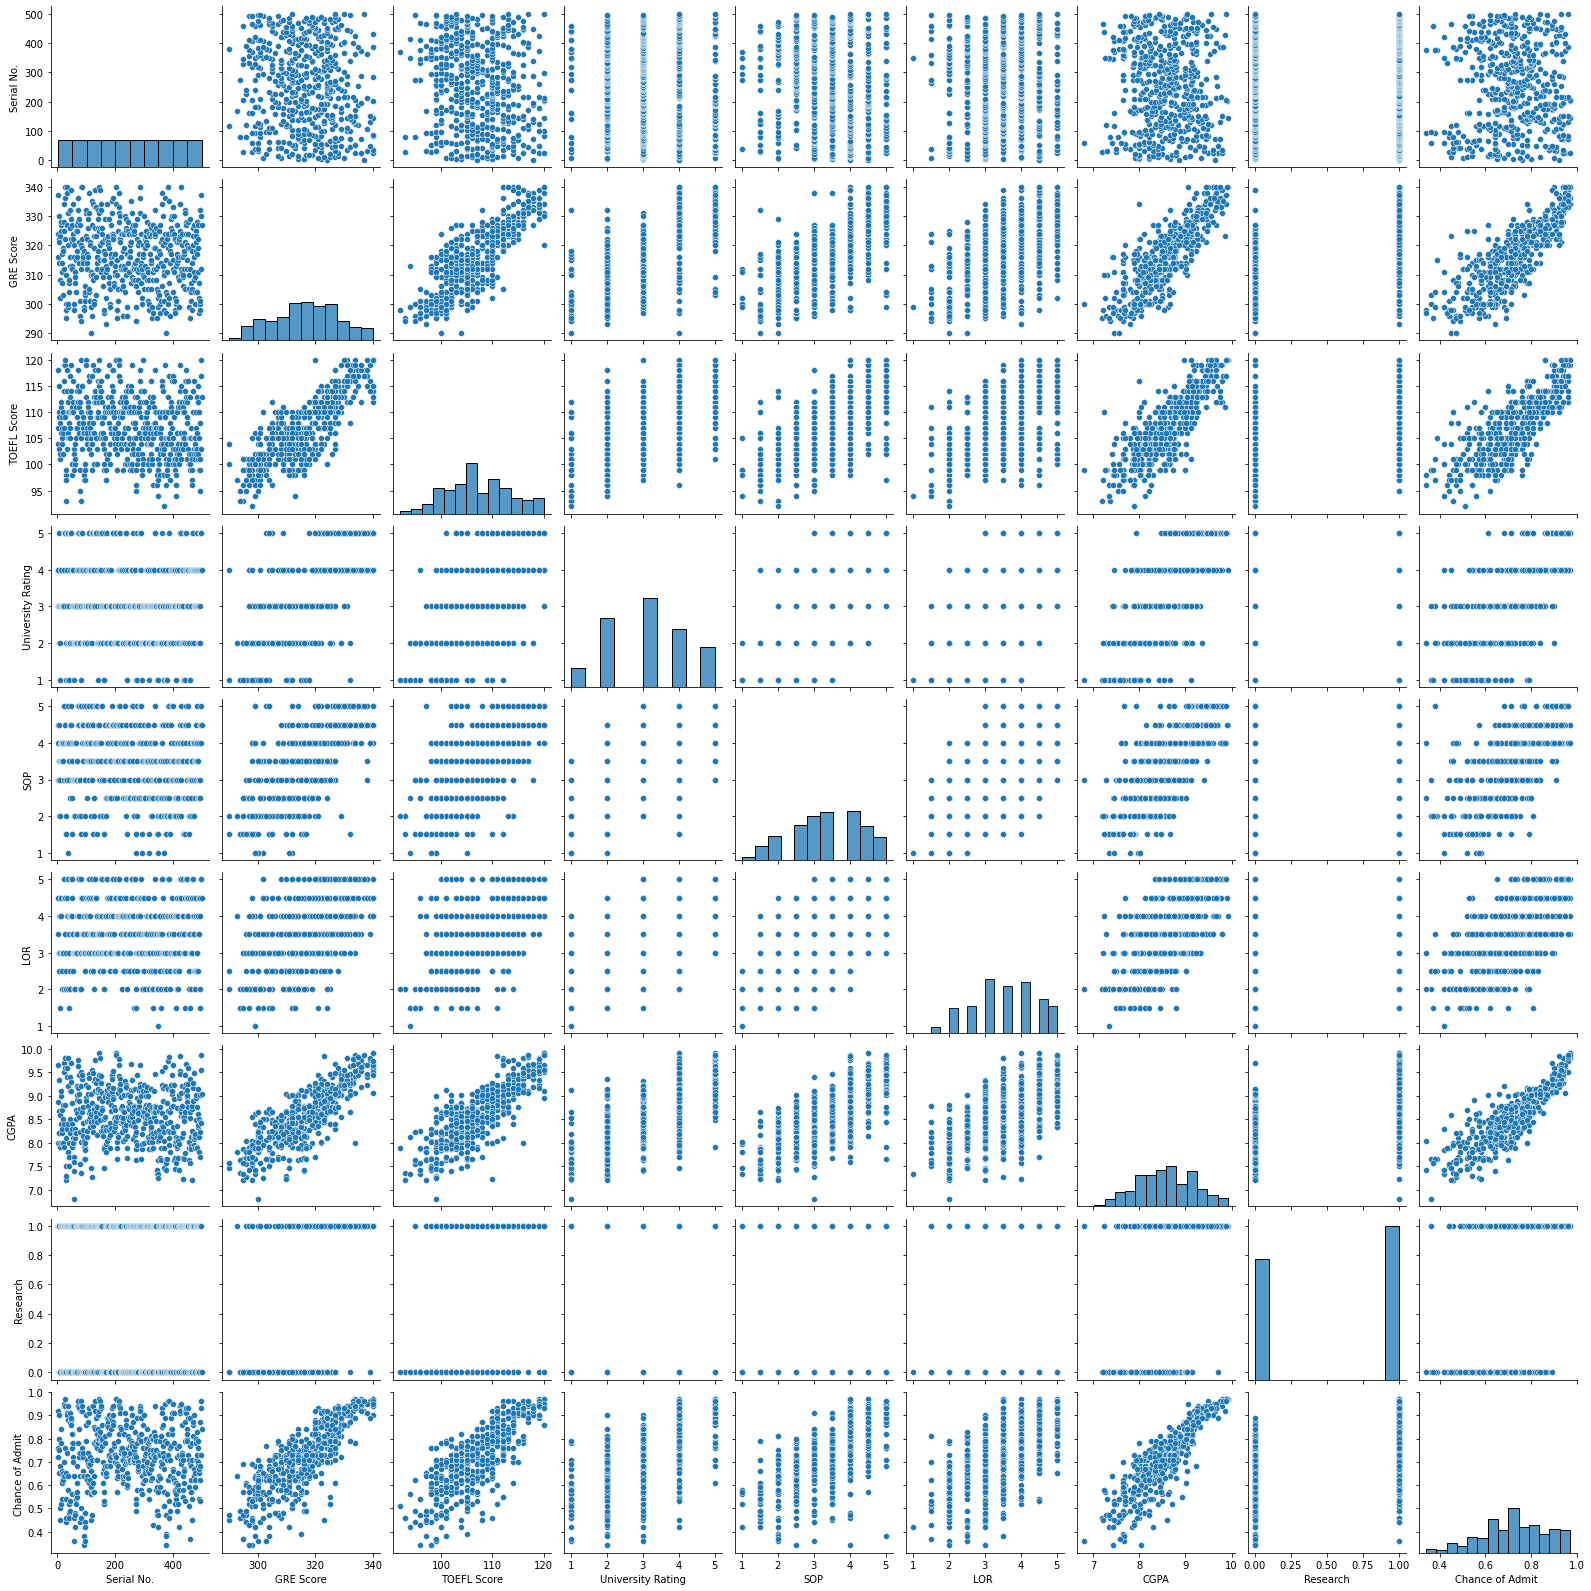

In [285]:
#Visualize correlation among the different variables
sns.pairplot(data)

In [286]:
# Correlational matrix
cor  = data.corr()
cor

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

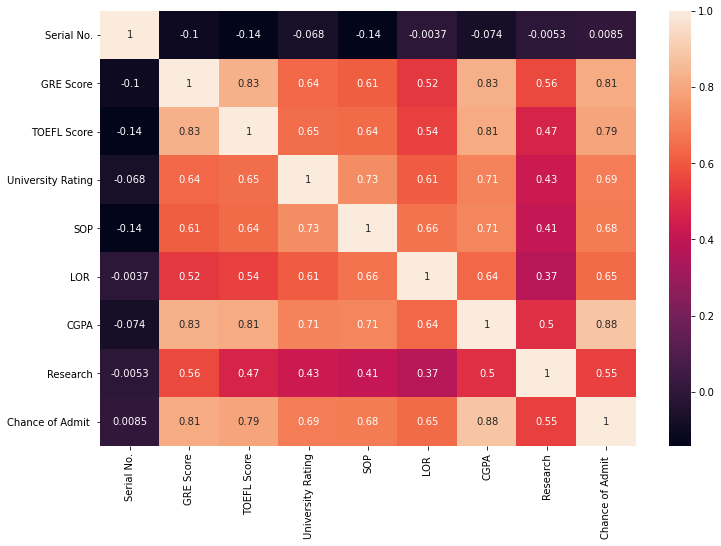

In [287]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot = True)

In [288]:
#Renaming column Chance of Admit
data=data.rename(columns = {'Chance of Admit ':'Chance_of_Admit'})


In [289]:
data.isnull().sum().sort_values(ascending=False)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [290]:
numeric_data = data.select_dtypes(include=[np.number])

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pawan\anacond

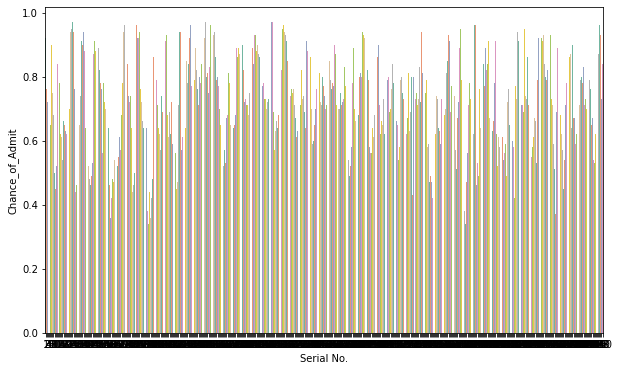

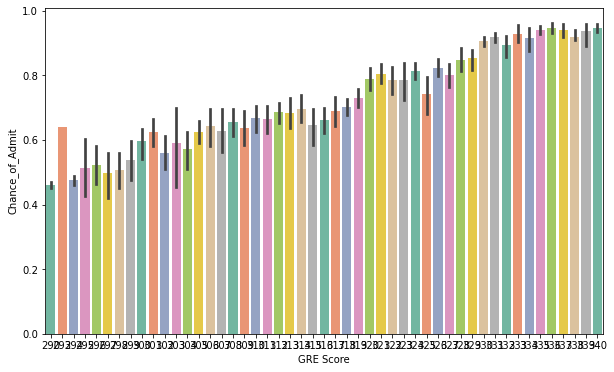

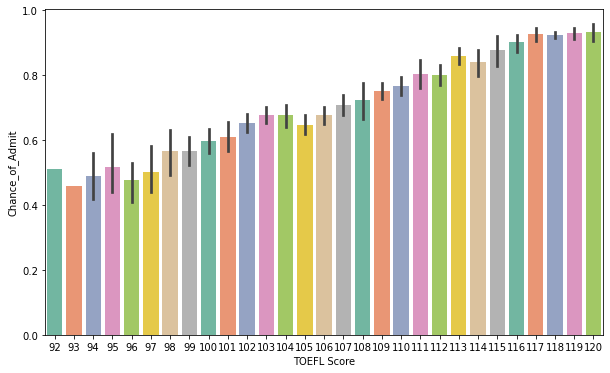

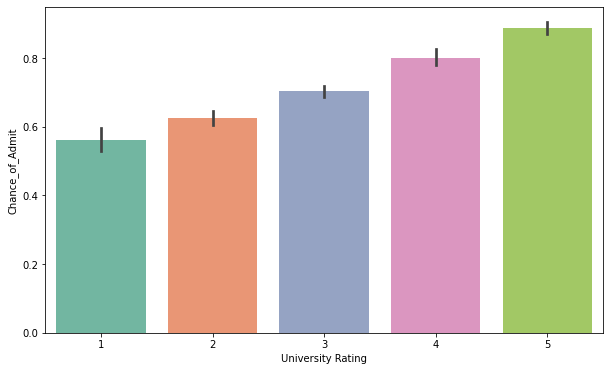

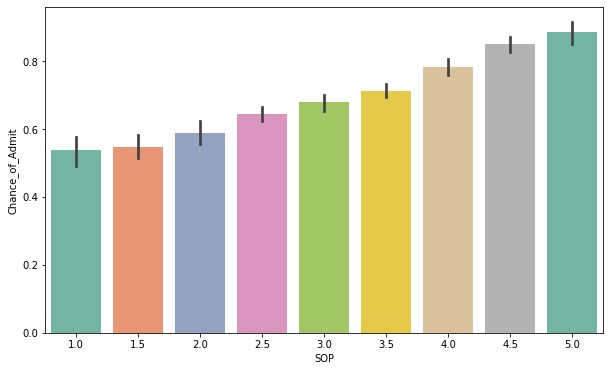

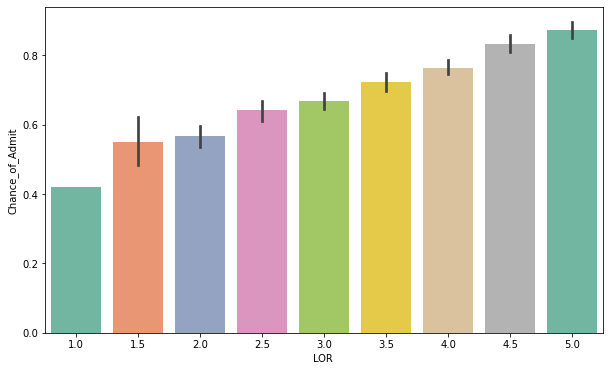

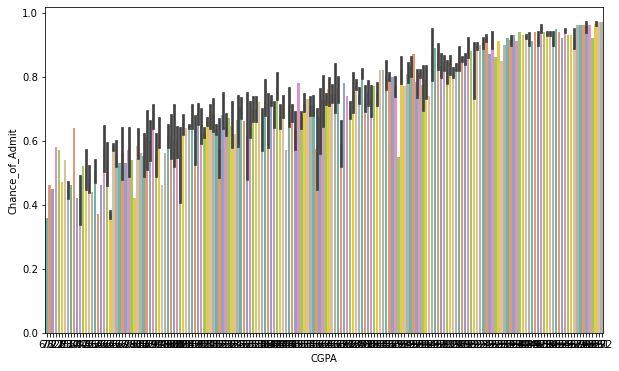

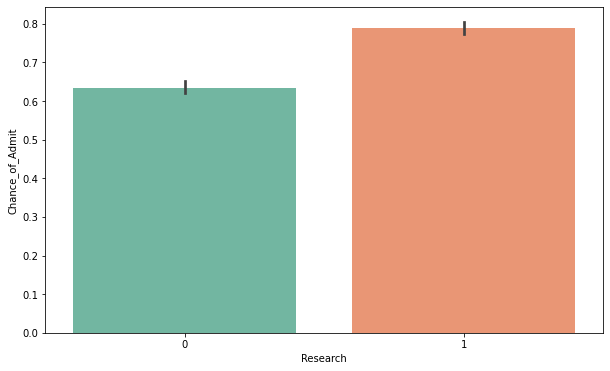

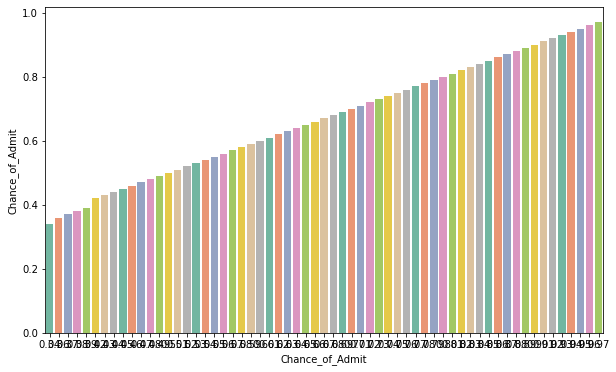

In [291]:
# run a for loop to build a plot for all numerical variable
for feature in numeric_data:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'Chance_of_Admit',data=data,palette='Set2')

### Q.2	Find out the minimum and maximum values for GRE score	[5]

In [292]:
#Renaming column Chance of Admit
data=data.rename(columns = {'GRE Score':'GRE_Score'})

In [293]:
data.head()

,Serial No.,GRE_Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [294]:
data.GRE_Score.max()

340

In [295]:
data.GRE_Score.min()

290

### Q.3	Find out the percentage of universities for each university rating	[5]

In [296]:
#Renaming column Chance of Admit
data=data.rename(columns = {'University Rating':'University_Rating'})

In [297]:
data.University_Rating.value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University_Rating, dtype: int64

In [298]:
# Groupby the data by "University rating".
data.groupby("University_Rating").mean()

,Serial No.,GRE_Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance_of_Admit
University_Rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


### Q.4	Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :

Students having the “Chance of Admit” value > 0.80, are assigned value 1, and

Students having the “Chance of Admit” value < 0.80, are assigned value 0

Where 0: Low chance of Admission and 1: High chance of admission	[5]


In [299]:
from collections import Counter 
Counter([i-i%0.1+0.1 for i in data['Chance_of_Admit']])

Counter({1.0: 61,
         0.8: 132,
         0.9: 94,
         0.7000000000000001: 116,
         0.5: 31,
         0.6: 58,
         0.4: 8})

In [300]:
data['Label']= np.where(data['Chance_of_Admit']<=0.8,0,1)
print(data['Label'].value_counts())
data.sample(5)

0    358
1    142
Name: Label, dtype: int64


,Serial No.,GRE_Score,TOEFL Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Label
56,57,316,102,3,2.0,3.0,7.40,0,0.64,0
171,172,334,117,5,4.0,4.5,9.07,1,0.89,1
128,129,326,112,3,3.5,3.0,9.10,1,0.84,1
269,270,308,108,4,4.5,5.0,8.34,0,0.77,0
9,10,323,108,3,3.5,3.0,8.60,0,0.45,0


In [301]:
data.drop(columns='Chance_of_Admit',inplace=True)

In [302]:
#Renaming column Chance of Admit
data=data.rename(columns = {'Label':'Chance_of_Admit'})

In [303]:
data.head()

,Serial No.,GRE_Score,TOEFL Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0


### Q.5	Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.	[15]

In [304]:
X=data.drop(columns = ["Chance_of_Admit"])
y=data["Chance_of_Admit"]

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [306]:
y_train[0:2]

153    0
84     1
Name: Chance_of_Admit, dtype: int32

In [307]:
from sklearn import tree

In [308]:
dt=tree.DecisionTreeClassifier()

In [309]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [310]:
y_pred=dt.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [311]:
y_pred[0:5]

array([1, 0, 0, 0, 0])

In [312]:
from sklearn import metrics

In [313]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9266666666666666


In [314]:
print('precision',metrics.precision_score(y_test,y_pred))

precision 0.8837209302325582


In [315]:
print('Recall',metrics.recall_score(y_test,y_pred))

Recall 0.8636363636363636


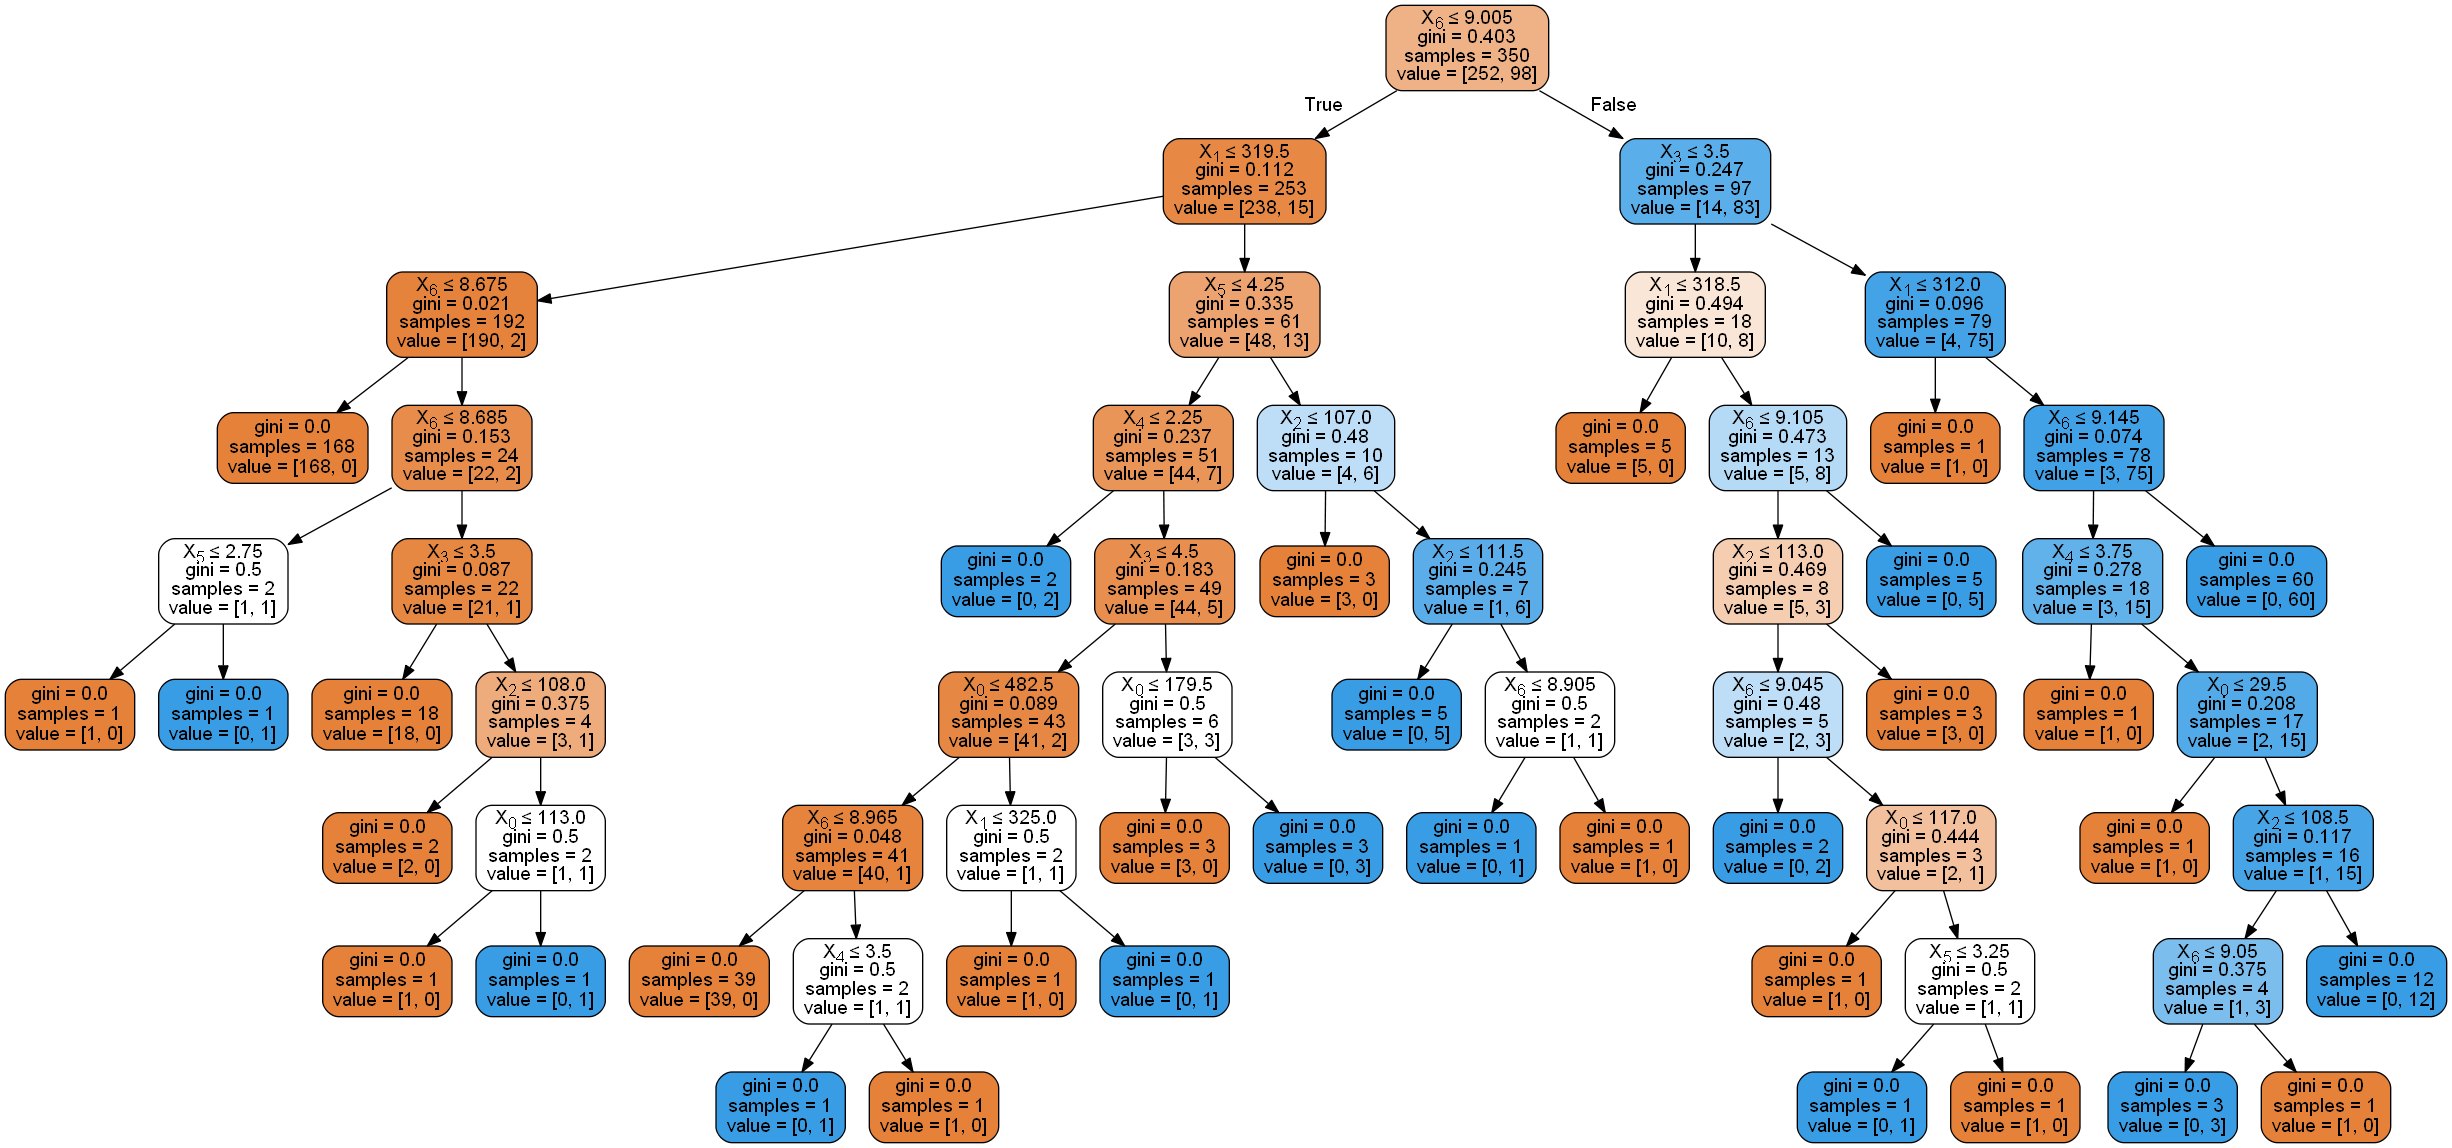

In [316]:
#plotting tree
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

### Hyperparameter tuning

In [317]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [318]:
# create function to genearte model report
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0: .3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                         results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [319]:
# specify parameters and distribution to sample from
param_dist={'max_depth':[3,None],        # 3,4,5,None
           'max_features': sp_randint(1,11), 
           'min_samples_split':sp_randint(2,11), # randomly select sample value
           'criterion':['gini','entropy']}  # min sampleslef, max_leaf_nodes

In [320]:
# run randomized search

n_iter_search=20
random_search=RandomizedSearchCV(dt,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [321]:
start=time()
random_search.fit(X_train,y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter settings.'%((time()-start),n_iter_search))
report(random_search.cv_results_)

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

Randomized search too 0.41 seconds for 20 candidatesparameter settings.
Model with rank: 1
Mean validation score:  0.909 (std: 0.043)
parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 2}

Model with rank: 2
Mean validation score:  0.906 (std: 0.041)
parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_split': 3}

Model with rank: 3
Mean validation score:  0.903 (std: 0.025)
parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_split': 8}

Model with rank: 3
Mean validation score:  0.903 (std: 0.038)
parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_split': 8}



C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

In [322]:
random_search.cv_results_

{'mean_fit_time': array([0.00478964, 0.00159907, 0.00159898, 0.00319729, 0.00159898,
        0.00322433, 0.00050707, 0.00319805, 0.00319777, 0.00163736,
        0.        , 0.00319791, 0.00159812, 0.00159945, 0.0018321 ,
        0.00479732, 0.00160446, 0.00319252, 0.        , 0.        ]),
 'std_fit_time': array([0.00391074, 0.00319815, 0.00319796, 0.00391586, 0.00319796,
        0.00394905, 0.00101414, 0.0039168 , 0.00391645, 0.00317835,
        0.        , 0.00391662, 0.00319624, 0.00319891, 0.00366421,
        0.00391704, 0.00320892, 0.00391003, 0.        , 0.        ]),
 'mean_score_time': array([0.0015995 , 0.        , 0.        , 0.        , 0.00159893,
        0.00020151, 0.0018013 , 0.00159883, 0.00042567, 0.00257492,
        0.        , 0.        , 0.00319872, 0.0032011 , 0.        ,
        0.        , 0.00159888, 0.00159888, 0.00320368, 0.00159903]),
 'std_score_time': array([0.00319901, 0.        , 0.        , 0.        , 0.00319786,
        0.00040302, 0.00312362, 0.003197

In [323]:
# us efull grid of mentioned parameter
param_grid={'max_depth':[3,None],        # 3,4,5,None
           'max_features': [1,3,10], 
           'min_samples_split':[2,3,10], # randomly select sample value
           'criterion':['gini','entropy']}  # min sampleslef, max_leaf_nodes

In [324]:
# run grid serach
grid_search=GridSearchCV(dt,param_grid=param_grid,cv=5)

In [325]:
start=time()
grid_search.fit(X_train,y_train)
print('gridsearchCV search too %.2f seconds for %d candidates' 'parameter settings.'%((time()-start),len(grid_search.cv_results_['params'])))
report(random_search.cv_results_)

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

gridsearchCV search too 0.67 seconds for 36 candidatesparameter settings.
Model with rank: 1
Mean validation score:  0.909 (std: 0.043)
parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 2}

Model with rank: 2
Mean validation score:  0.906 (std: 0.041)
parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_split': 3}

Model with rank: 3
Mean validation score:  0.903 (std: 0.025)
parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_split': 8}

Model with rank: 3
Mean validation score:  0.903 (std: 0.038)
parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_split': 8}



C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\pawan\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

In [326]:
Parameters:{'criterion':'gini','max_depth':3,'max_features':3,'min_samples_split':8}

In [327]:
dt_grid_search=tree.DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=3,min_samples_split=8)

In [328]:
dt_grid_search.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_split=8)

In [329]:
y_pred_gs=dt_grid_search.predict(X_test)

In [330]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred_gs))
print('Precision',metrics.precision_score(y_test,y_pred_gs))
print('Recall',metrics.recall_score(y_test,y_pred_gs))

Accuracy 0.9333333333333333
Precision 0.9047619047619048
Recall 0.8636363636363636


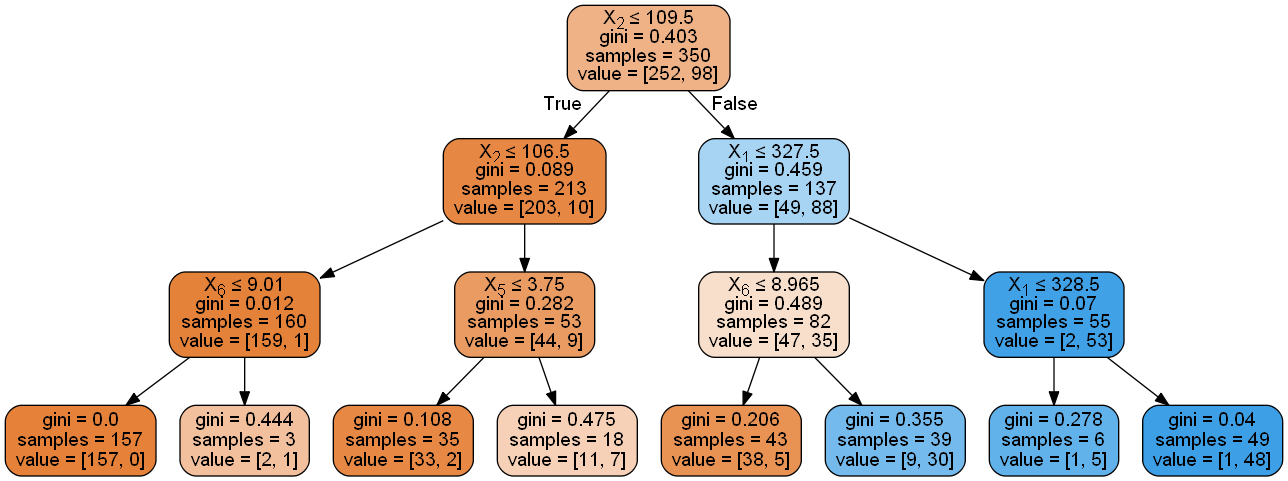

In [331]:
#plotting tree
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt_grid_search,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

## Q.6	Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.	[10]

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [333]:
rf = RandomForestClassifier()

In [334]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [335]:
ypred = rf.predict(X_test)

In [336]:
rf.feature_importances_

array([0.05185925, 0.19388951, 0.1406076 , 0.13236959, 0.09170294,
       0.06727495, 0.29740915, 0.02488701])

<function matplotlib.pyplot.show(close=None, block=None)>

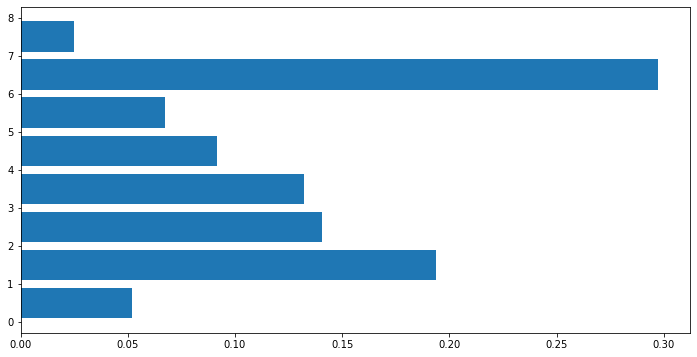

In [337]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12,6))
plt.barh(pos, feature_importance, align='center')
plt.show

In [338]:
from sklearn import metrics

In [339]:
print('Accuracy using RF:', metrics.accuracy_score(y_test,ypred))
print('Precision using RF:', metrics.precision_score(y_test,ypred))
print('Recall using RF:', metrics.recall_score(y_test, ypred))

Accuracy using RF: 0.9466666666666667
Precision using RF: 0.9090909090909091
Recall using RF: 0.9090909090909091


### Q.7	Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university.	[10]

In [340]:
from sklearn.ensemble import GradientBoostingClassifier

In [341]:
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [342]:
y_pred_b = clf.predict(X_test)

In [343]:
clf.score(X_train, y_train)

0.96

In [344]:
clf.score(X_test, y_test)

0.9466666666666667

In [345]:
metrics.accuracy_score(y_test,y_pred_b)

0.9466666666666667

In [346]:
from sklearn.ensemble import AdaBoostClassifier

In [347]:
clf=AdaBoostClassifier(n_estimators=100, random_state=100)

In [348]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=100)

In [349]:
y_pred_ad = clf.predict(X_test)

In [350]:
metrics.accuracy_score(y_test,y_pred_ad)

0.9066666666666666

### Q.8	Compare all of the models and justify your choice about the optimum model.	[10]

In [351]:
print('Accuracy Using DT',metrics.accuracy_score(y_test,y_pred_gs))
print('Accuracy using RF:', metrics.accuracy_score(y_test,ypred))
print('Accuracy usiing GB:',metrics.accuracy_score(y_test,y_pred_b))
print('Accuracy usiing AdB:',metrics.accuracy_score(y_test,y_pred_ad))

Accuracy Using DT 0.9333333333333333
Accuracy using RF: 0.9466666666666667
Accuracy usiing GB: 0.9466666666666667
Accuracy usiing AdB: 0.9066666666666666
